<a href="https://colab.research.google.com/github/archie46/Machine-Learning-/blob/main/Tennis_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tennis.csv to tennis.csv


In [ ]:
from pandas import read_csv
file = "tennis.csv"
data = read_csv(file,usecols =['Weather','Parents','Cash','Exam','Decision'])

data.shape

(11, 5)

In [ ]:
data

,Weather,Parents,Cash,Exam,Decision
0,sunny,visit,rich,yes,cinema
1,sunny,no-visit,rich,no,tennis
2,windy,visit,rich,no,cinema
3,rainy,visit,poor,yes,cinema
4,rainy,no-visit,rich,no,stay-in
5,rainy,visit,poor,no,cinema
6,windy,no-visit,poor,yes,cinema
7,windy,no-visit,rich,yes,shopping
8,windy,visit,rich,no,cinema
9,sunny,no-visit,rich,no,tennis


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = ['Weather','Parents','Cash','Exam','Decision']
for i in labels:
    data[i] = le.fit_transform(data[i])

In [ ]:
x = data.filter(['Weather','Parents','Cash','Exam'],axis = 1)
y = data['Decision']

In [ ]:
y

0     0
1     3
2     0
3     0
4     2
5     0
6     0
7     1
8     0
9     3
10    3
Name: Decision, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8, 4)
(8,)
(3, 4)
(3,)


In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([2, 3, 0])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
accuracy_score(y_test,y_pred)

1.0

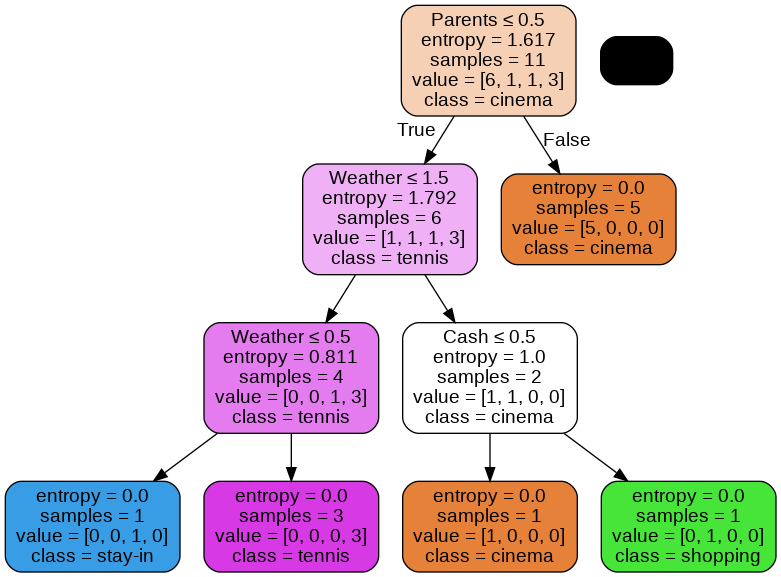

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
labl = ['Weather','Parents','Cash','Exam']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = labl,class_names=['cinema','shopping','stay-in','tennis'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
import numpy as np
y_check = np.array([1,0,1,1])
y_c = y_check.reshape(1,-1)
z = classifier.predict(y_c)
if z == 0:
  print("cinema")
if z == 1:
  print("shopping")
if z == 2:
  print("stay-in")
if z == 3:
  print("tennis")

tennis


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
